# <font color="#2128A6">Predicting House Sale Prices

The **aim of this project** is to build a predictive model that estimates house prices based on the provided features. By analyzing the dataset, the model will identify patterns and relationships between house attributes and their prices. This will help in making accurate predictions for future listings and providing valuable insights for buyers, sellers, and real estate agents.

The dataset includes house listings from four cities in Turkey: **Istanbul**, **İzmir**, **Ankara**, and **Antalya**.

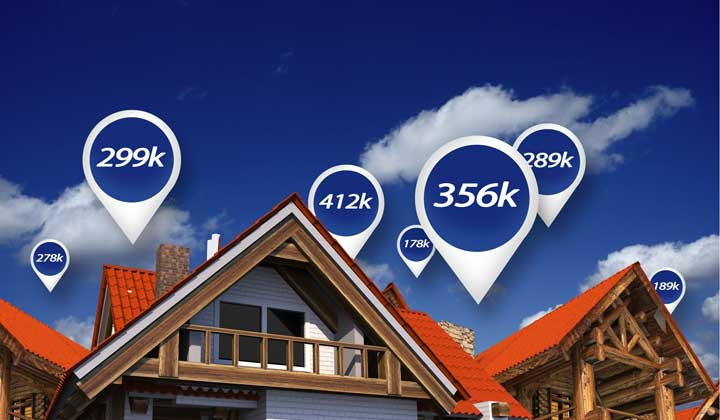

## <font color="#2128A6"> Data Overview

| Column Name              | Description                                                                                   |
|--------------------------|-----------------------------------------------------------------------------------------------|
| **Fiyat**                | The price of the house (in Turkish Lira).                                                     |
| **İlan Tarihi**          | The listing date of the property.                                                             |
| **Net m²**               | The usable area of the house in square meters.                                                |
| **Brüt m²**              | The gross area of the house in square meters.                                                 |
| **Oda Sayısı**           | The number of rooms (e.g., 2+1 means 2 bedrooms and 1 living room).                           |
| **Banyo Sayısı**         | The number of bathrooms in the house.                                                         |
| **Binadaki Kat Sayısı**  | The total number of floors in the building.                                                   |
| **Bulunduğu Kat**        | The floor on which the house is located (e.g., "Ara Kat" means middle floor).                 |
| **Bina Yaşı**            | The age of the building (e.g., "31-35 arası" means between 31 and 35 years old).              |
| **Yapının Durumu**       | Indicates whether the house is new ("Sıfır") or second-hand ("İkinci El").                    |
| **Isıtma Tipi**          | The type of heating system (e.g., "Kombi (Doğalgaz)" or "Merkezi Sistem").                    |
| **Kira Getirisi**        | Monthly rental income from the property (in Turkish Lira).                                    |
| **Aidat**                | Monthly maintenance fee for the property (in Turkish Lira).                                   |
| **Kullanım Durumu**      | The occupancy status of the house (e.g., "Boş" means empty, "Kiracılı" means rented).         |
| **Krediye Uygun**        | Indicates whether the house is eligible for a mortgage loan ("Evet" means yes, "Hayır" means no). |
| **Tapu Durumu**          | The ownership type of the title deed (e.g., "Kat Mülkiyeti" means condominium ownership).      |
| **Görüntülü Ev Gezintisi** | Indicates whether a video tour of the house is available.                                    |
| **Mobilya Durumu**       | Specifies whether the house is furnished ("Eşyalı") or unfurnished ("Eşyasız").               |
| **Kimden**               | Indicates whether the house is being sold by an agent, owner, or consultant.                  |
| **Parsel**               | Plot number (if available).                                                                   |
| **Ada**                  | Block number (if available).                                                                  |
| **Konut Şekli**          | The type of the house (e.g., "Ara Kat" means middle floor).                                    |
| **Şehir**                | The city where the house is located (Istanbul, İzmir, Ankara, Antalya).             |


## <font color="#2128A6"> Requirements

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## Import Data

In [6]:
df=pd.read_csv('houseforsale.csv')

In [7]:
df.head()

,Fiyat,İlan Tarihi,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Yapının Durumu,Isıtma Tipi,Kira Getirisi,Aidat,Kullanım Durumu,Krediye Uygun,Tapu Durumu,Görüntülü Ev Gezintisi,Mobilya Durumu,Tapu Durumu.1,Kimden,Parsel,Ada,Konut Şekli,Sehir
0,3700000,19 Aralık 2024,95.0,100m²,2+1,1,5,2,11-15 arası,İkinci El,Kombi (Doğalgaz),20.000 TL (aylık),200 TL (aylık),Boş,Evet,Kat Mülkiyeti,NaN,Eşyasız,Kat Mülkiyeti,Danışman,NaN,NaN,Ara Kat,Istanbul
1,6500000,18 Aralık 2024,95.0,120m²,3+1,2,9,2,31-35 arası,NaN,Merkezi Sistem,0 TL (aylık),0 TL (aylık),Kiracılı,Evet,NaN,NaN,Eşyasız,NaN,NaN,NaN,NaN,Ara Kat,Istanbul
2,5500000,17 Aralık 2024,90.0,119m²,2+1,2,10-20 arası,10,0,Sıfır,Merkezi Sistem (Isı Payı Ölçer),0 TL (aylık),0 TL (aylık),Boş,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Istanbul
3,2700000,17 Aralık 2024,120.0,130m²,3+1,1,5,1,31-35 arası,İkinci El,Kombi (Doğalgaz),15.000 TL (aylık),200 TL (aylık),Mülk Sahibi,Evet,Kat Mülkiyeti,NaN,Eşyasız,Kat Mülkiyeti,Danışman,NaN,NaN,Ara Kat,Istanbul
4,25000000,16 Aralık 2024,160.0,189m²,3+1,2,4,Yüksek Giriş,21-25 arası,NaN,Kombi (Doğalgaz),100.000 TL (aylık),6.000 TL (aylık),Kiracılı,Hayır,Hisseli Tapu,NaN,Eşyasız,Hisseli Tapu,NaN,NaN,NaN,NaN,Istanbul


## <font color="#2128A6">EDA (Exploratory Data Analysis)

In [9]:
df.shape

(2520, 24)

In [10]:
df.isnull().sum()

Fiyat                        0
İlan Tarihi                 39
Net m²                     364
Brüt m²                    492
Oda Sayısı                 508
Banyo Sayısı               508
Binadaki Kat Sayısı        392
Bulunduğu Kat              570
Bina Yaşı                  724
Yapının Durumu            1177
Isıtma Tipi                470
Kira Getirisi             1355
Aidat                     1311
Kullanım Durumu            522
Krediye Uygun               39
Tapu Durumu               1930
Görüntülü Ev Gezintisi    2520
Mobilya Durumu            1870
Tapu Durumu.1             1930
Kimden                    2189
Parsel                    2314
Ada                       2303
Konut Şekli               1296
Sehir                        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fiyat                   2520 non-null   int64  
 1   İlan Tarihi             2481 non-null   object 
 2   Net m²                  2156 non-null   object 
 3   Brüt m²                 2028 non-null   object 
 4   Oda Sayısı              2012 non-null   object 
 5   Banyo Sayısı            2012 non-null   object 
 6   Binadaki Kat Sayısı     2128 non-null   object 
 7   Bulunduğu Kat           1950 non-null   object 
 8   Bina Yaşı               1796 non-null   object 
 9   Yapının Durumu          1343 non-null   object 
 10  Isıtma Tipi             2050 non-null   object 
 11  Kira Getirisi           1165 non-null   object 
 12  Aidat                   1209 non-null   object 
 13  Kullanım Durumu         1998 non-null   object 
 14  Krediye Uygun           2481 non-null   

In [12]:
df.sample(3)

,Fiyat,İlan Tarihi,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Yapının Durumu,Isıtma Tipi,Kira Getirisi,Aidat,Kullanım Durumu,Krediye Uygun,Tapu Durumu,Görüntülü Ev Gezintisi,Mobilya Durumu,Tapu Durumu.1,Kimden,Parsel,Ada,Konut Şekli,Sehir
1074,15900000,20 Kasım 2024,180,220m²,3+1,2,2,NaN,6-10 arası,İkinci El,Klima,50.000 TL (aylık),NaN,Boş,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tripleks,Izmir
2218,8200000,21 Kasım 2024,200.0,220m²,4+1,3,4,3,6-10 arası,NaN,Klima,0 TL (aylık),0 TL (aylık),Mülk Sahibi,Evet,NaN,NaN,Eşyasız,NaN,NaN,NaN,NaN,Çatı Dubleksi,Antalya
474,60000000,11 Aralık 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evet,NaN,NaN,NaN,NaN,NaN,187.0,2344.0,NaN,Istanbul


## <font color="#2128A6">Feature Engineering (Cleaning Data and Handling Missing Values)

In [14]:
df['Net m²'] = df['Net m²'].replace('-', None)
df['Net m²'] = df['Net m²'].replace('', None)
df['Net m²']=df['Net m²'].astype(float)

In [15]:
df['Brüt m²'] = df['Brüt m²'].replace(r'[^\d.]', '', regex=True)
df['Brüt m²'] = pd.to_numeric(df['Brüt m²'], errors='coerce')

In [16]:
df['Banyo Sayısı'] = df['Banyo Sayısı'].fillna(0)
df['Banyo Sayısı'] = df['Banyo Sayısı'].replace(r'[^\d.]', '', regex=True)
df['Banyo Sayısı']=df['Banyo Sayısı'].astype(int)

In [17]:
kat_sayisi={'10-20 arası':15,'20 ve üzeri':20,'20+':20,'Between 10-20':15}
df['Binadaki Kat Sayısı']=df['Binadaki Kat Sayısı'].replace(kat_sayisi)
df['Binadaki Kat Sayısı'] = df['Binadaki Kat Sayısı'].fillna(0)
df['Binadaki Kat Sayısı']=df['Binadaki Kat Sayısı'].astype(int)

In [18]:
bulundugu_kat={
    'Bahçe katı':0,
    'Yüksek Giriş':0,
    'Giriş Katı':0,
    'Müstakil':0,
    'Ara Kat': 3,
    'Zemin Kat':0,
    '20 ve üzeri':20,
    'Kot 1':1,
    'En Üst Kat':20,
    'Kot 2':2,
    'Çatı Katı':5,
    'Komple':0,
    'Garden Floor':0,
    'Detached':0,
    'Kot 3':3,
    'Raised First Floor':1,
    'Top Floor':10,
    'Ground Floor':0,
    '20+':20,
    'Bodrum Kat':-1,
    'Teras Kat':5,
    'First Floor':1
}
df['Bulunduğu Kat']=df['Bulunduğu Kat'].replace(bulundugu_kat)
df['Bulunduğu Kat'] = df['Bulunduğu Kat'].fillna(0)
df['Bulunduğu Kat']=df['Bulunduğu Kat'].astype(int)

In [19]:
bina_yasi={
    '6-10 arası':8,
    '26-30 arası':28,
    '11-15 arası':13,
    '16-20 arası':18,
    '21-25 arası':23,
    '31-35 arası':33,
    '36-40 arası':38,
    '40 ve üzeri':40,
    'Between 6-10':8,
    'Between 16-20':18,
    'Between 26-30':28,
    'Between 11-15':13,
    'Between 31-35':33,
    'Between 21-25':23,
    '40+':40
}
df['Bina Yaşı']=df['Bina Yaşı'].replace(bina_yasi)
df['Bina Yaşı'] = df['Bina Yaşı'].fillna(0)
df['Bina Yaşı']=df['Bina Yaşı'].astype(int)

In [20]:
df['Isıtma Tipi'].value_counts()

Isıtma Tipi
Kombi (Doğalgaz)                     973
Klima                                430
Merkezi Sistem (Isı Payı Ölçer)      178
Merkezi Sistem                       112
Yerden Isıtma                        109
Yok                                   97
Combi Boiler (Natural Gas)            37
Soba (Kömür)                          29
Kombi (Elektrikli)                    16
Air Conditioner                       13
Central System (Heat Share Meter)     11
Kat Kaloriferi                        10
Kalorifer (Doğalgaz)                   7
Soba (Doğalgaz)                        6
Fancoil                                6
Floor Heating                          4
Jeotermal                              4
Central System                         2
Stove (Coal)                           2
Central Heating (Natural Gas)          1
Stove (Natural Gas)                    1
Kalorifer (Akaryakıt)                  1
Kalorifer (Kömür)                      1
Name: count, dtype: int64

In [21]:
def filling_values_based_on_price(column_name):
    mean_price_per_row = df.groupby(column_name)['Fiyat'].mean()
    df[column_name] = df.apply(
        lambda row: (mean_price_per_row - row['Fiyat']).abs().idxmin()
        if pd.isna(row[column_name]) else row[column_name],
        axis=1
    )
    return df[column_name] 

In [22]:
isitma_tipi={
    'Kombi (Doğalgaz)':'Doğalgaz',
    'Merkezi Sistem (Isı Payı Ölçer)':'Merkezi Sistem',
    'Combi Boiler (Natural Gas)':'Doğalgaz',
    'Kombi (Elektrikli)':'Elektrik',
    'Air Conditioner':'Klima',
    'Central System (Heat Share Meter)':'Merkezi Sistem',
    'Kat Kaloriferi':'Soba (Doğalgaz)',
    'Kalorifer (Doğalgaz)':'Doğalgaz',
    'Fancoil':'Elektrik',
    'Floor Heating':'Yerden Isıtma',
    'Jeotermal':'Yerden Isıtma',
    'Central System':'Merkezi Sistem',
    'Stove (Coal)':'Soba (Kömür)',
    'Central Heating (Natural Gas)':'Merkezi Sistem',
    'Stove (Natural Gas)':'Soba (Doğalgaz)',
    'Kalorifer (Akaryakıt)':'Soba (Doğalgaz)',
    'Kalorifer (Kömür)':'Soba (Kömür)'
}
df['Isıtma Tipi']=df['Isıtma Tipi'].replace(isitma_tipi)
df["Isıtma Tipi"]=filling_values_based_on_price("Isıtma Tipi")

In [23]:
df['Kira Getirisi'] = df['Kira Getirisi'].replace(r'[^\d]', '', regex=True)
df['Kira Getirisi'] = df['Kira Getirisi'].replace('', '0')
df['Kira Getirisi'] = df['Kira Getirisi'].astype(float)
df['Kira Getirisi']=df['Kira Getirisi'].fillna(0)

In [24]:
df['Aidat'] = df['Aidat'].replace(r'[^\d]', '', regex=True)
df['Aidat'] = df['Aidat'].fillna(0)
df['Aidat'] = df['Aidat'].astype(int)

In [25]:
kullanim_durumu={
    'Vacant':'Boş',
    'Occupied By Property Owner':'Mülk Sahibi',
    'Occupied By Tenant':'Kiracılı'
}
df['Kullanım Durumu']=df['Kullanım Durumu'].replace(kullanim_durumu)
df['Kullanım Durumu']=df['Kullanım Durumu'].fillna('Boş')

In [26]:
yapinin_durumu={
    'Second Hand':'İkinci El',
    'New Building':'Sıfır'
}
df['Yapının Durumu']=df['Yapının Durumu'].replace(yapinin_durumu)
df['Yapının Durumu']=filling_values_based_on_price("Yapının Durumu")

In [27]:
df.isnull().sum()

Fiyat                        0
İlan Tarihi                 39
Net m²                     366
Brüt m²                    492
Oda Sayısı                 508
Banyo Sayısı                 0
Binadaki Kat Sayısı          0
Bulunduğu Kat                0
Bina Yaşı                    0
Yapının Durumu               0
Isıtma Tipi                  0
Kira Getirisi                0
Aidat                        0
Kullanım Durumu              0
Krediye Uygun               39
Tapu Durumu               1930
Görüntülü Ev Gezintisi    2520
Mobilya Durumu            1870
Tapu Durumu.1             1930
Kimden                    2189
Parsel                    2314
Ada                       2303
Konut Şekli               1296
Sehir                        0
dtype: int64

In [28]:
df["Oda Sayısı"]=filling_values_based_on_price("Oda Sayısı")

In [29]:
df['Net m²']=filling_values_based_on_price("Net m²")
df['Net m²'] = df['Net m²'].astype(int)

In [30]:
df['Brüt m²']=filling_values_based_on_price("Brüt m²")
df['Brüt m²'] = df['Brüt m²'].astype(int)

In [31]:
mobilya_durumu={
    'Eşyalı (Mobilyalı)':'Eşyalı',
    'Unfurnished':'Eşyalı',
    'Sadece Mutfak':'Sadece Beyaz Eşya',
    'Furnished':'Eşyalı',
    
}
df['Mobilya Durumu']=df['Mobilya Durumu'].replace(mobilya_durumu)
df['Mobilya Durumu']=filling_values_based_on_price("Mobilya Durumu")

In [32]:
krediye_uygun={
    'Yes':'Evet',
    np.nan:'Hayır'
}
df['Krediye Uygun']=df['Krediye Uygun'].replace(krediye_uygun)

In [33]:
df.isnull().sum()

Fiyat                        0
İlan Tarihi                 39
Net m²                       0
Brüt m²                      0
Oda Sayısı                   0
Banyo Sayısı                 0
Binadaki Kat Sayısı          0
Bulunduğu Kat                0
Bina Yaşı                    0
Yapının Durumu               0
Isıtma Tipi                  0
Kira Getirisi                0
Aidat                        0
Kullanım Durumu              0
Krediye Uygun                0
Tapu Durumu               1930
Görüntülü Ev Gezintisi    2520
Mobilya Durumu               0
Tapu Durumu.1             1930
Kimden                    2189
Parsel                    2314
Ada                       2303
Konut Şekli               1296
Sehir                        0
dtype: int64

## <font color="#2128A6"> Data Visualization

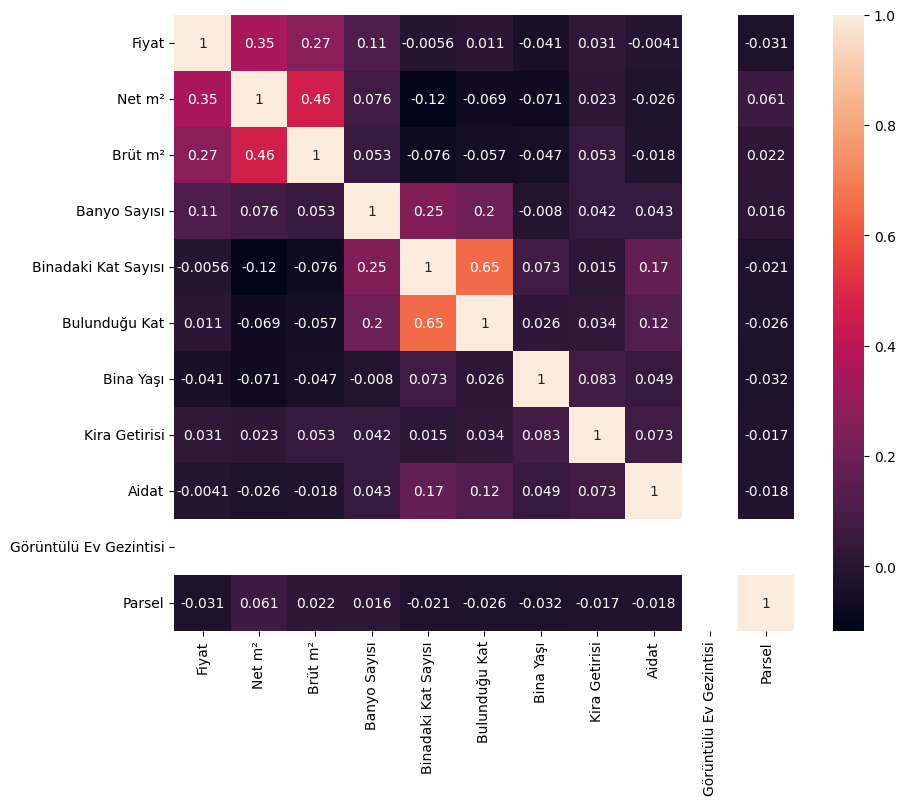

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True);

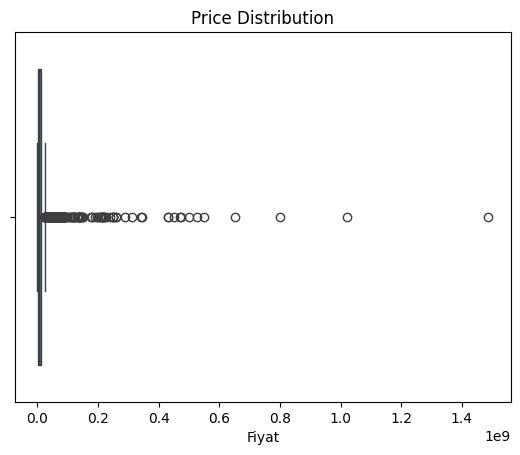

In [36]:
sns.boxplot(x=df["Fiyat"])
plt.title("Price Distribution");

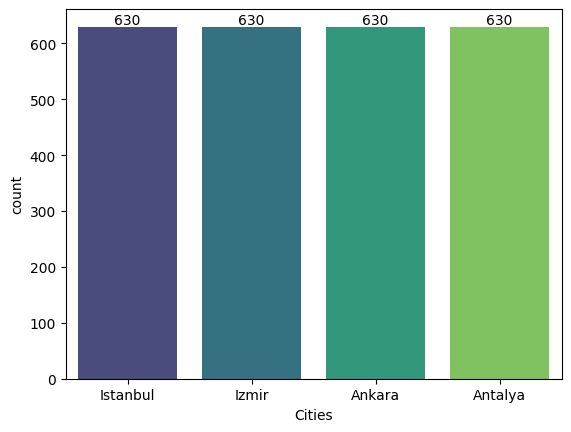

In [37]:
ax=sns.countplot(x=df["Sehir"],palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Cities");

In [38]:
df.head(3)

,Fiyat,İlan Tarihi,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Yapının Durumu,Isıtma Tipi,Kira Getirisi,Aidat,Kullanım Durumu,Krediye Uygun,Tapu Durumu,Görüntülü Ev Gezintisi,Mobilya Durumu,Tapu Durumu.1,Kimden,Parsel,Ada,Konut Şekli,Sehir
0,3700000,19 Aralık 2024,95,100,2+1,1,5,2,13,İkinci El,Doğalgaz,20000.0,200,Boş,Evet,Kat Mülkiyeti,NaN,Eşyasız,Kat Mülkiyeti,Danışman,NaN,NaN,Ara Kat,Istanbul
1,6500000,18 Aralık 2024,95,120,3+1,2,9,2,33,Yapım Aşamasında,Merkezi Sistem,0.0,0,Kiracılı,Evet,NaN,NaN,Eşyasız,NaN,NaN,NaN,NaN,Ara Kat,Istanbul
2,5500000,17 Aralık 2024,90,119,2+1,2,15,10,0,Sıfır,Merkezi Sistem,0.0,0,Boş,Evet,NaN,NaN,Eşyalı,NaN,NaN,NaN,NaN,NaN,Istanbul


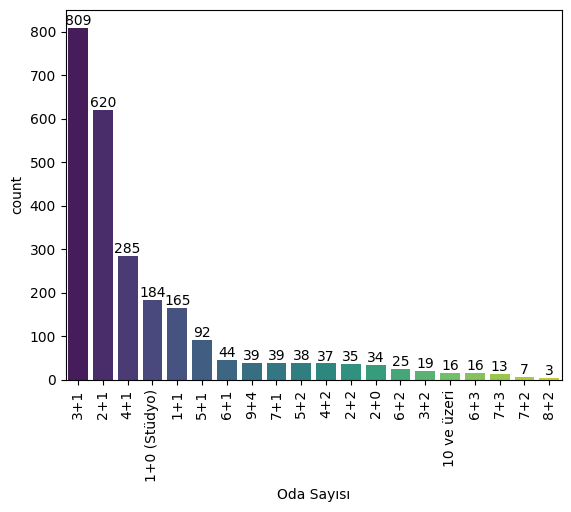

In [39]:
ax=sns.countplot(x=df["Oda Sayısı"],palette="viridis",order=df["Oda Sayısı"].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90);

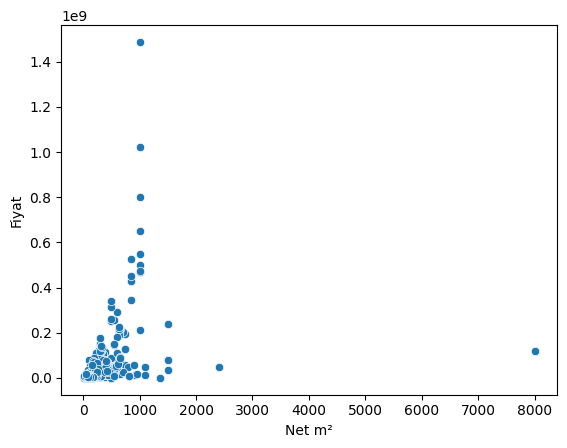

In [40]:
sns.scatterplot(x="Net m²",y="Fiyat",data=df,palette="coolwarm");

<Axes: >

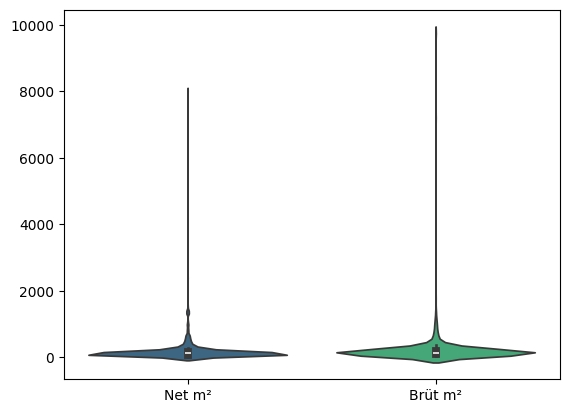

In [41]:
sns.violinplot(data=df[['Net m²',"Brüt m²"]], palette="viridis")

## <font color="#2128A6"> Outlier Analysis

In [43]:
lower_bound = df['Fiyat'].quantile(q=0.03)
upper_bound = df['Fiyat'].quantile(q=0.97)
df = df[(df['Fiyat'] >= lower_bound) & (df['Fiyat'] <= upper_bound)]

## <font color="#2128A6"> Modelling - Deep Learning

In [45]:
abs(df.corr(numeric_only=True)['Fiyat'].sort_values(ascending=False))

Fiyat                     1.000000
Brüt m²                   0.411129
Net m²                    0.326368
Banyo Sayısı              0.274909
Kira Getirisi             0.157863
Aidat                     0.088756
Binadaki Kat Sayısı       0.039915
Bulunduğu Kat             0.027381
Parsel                    0.055587
Bina Yaşı                 0.103359
Görüntülü Ev Gezintisi         NaN
Name: Fiyat, dtype: float64

In [46]:
x=df[['Net m²', 'Brüt m²', 'Oda Sayısı',
       'Banyo Sayısı', 'Binadaki Kat Sayısı', 'Bulunduğu Kat', 'Bina Yaşı',
       'Yapının Durumu', 'Isıtma Tipi', 'Kira Getirisi', 'Aidat','Sehir','Kullanım Durumu','Krediye Uygun','Mobilya Durumu']]
y=df[['Fiyat']]

In [47]:
x=pd.get_dummies(x,drop_first=True)

In [48]:
x_scaled=scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [49]:
x_scaled['Banyo Sayısı']=x_scaled['Banyo Sayısı']*15
x_scaled['Net m²']=x_scaled['Net m²']*20
x_scaled['Brüt m²']=x_scaled['Brüt m²']*15

In [50]:
x_train , x_test, y_train, y_test =train_test_split(x_scaled,y,test_size=.2,random_state=42)

In [51]:
model=Sequential()
model.add(Dense(120,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse",optimizer="adam")

In [52]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300,verbose=0)

In [53]:
tahmin=model.predict(x_test)
r2_score(y_test,tahmin)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


0.854774534702301

In [54]:
mean_squared_error(y_test,tahmin)**0.5

4512676.3680597525

<Axes: >

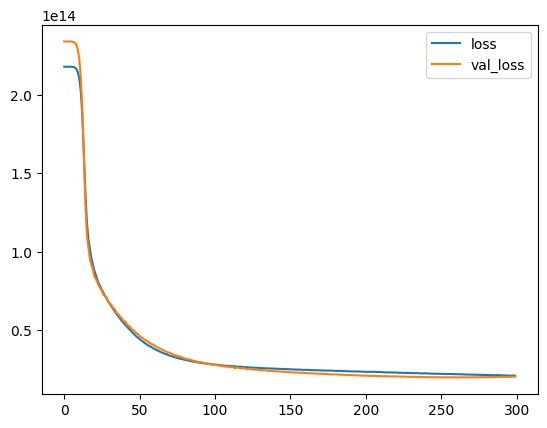

In [55]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

## <font color="#2128A6"> Modelling - Convolutional Methods

In [57]:

def algo_test(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted',color='red',linestyle='--')
        plt.xlabel('Predicted Sale Price')
        plt.ylabel('Actual Sale Price')
        plt.title('Actual vs Predicted Sale Price for Best Model')
        plt.legend()
        plt.show()
    return r_table

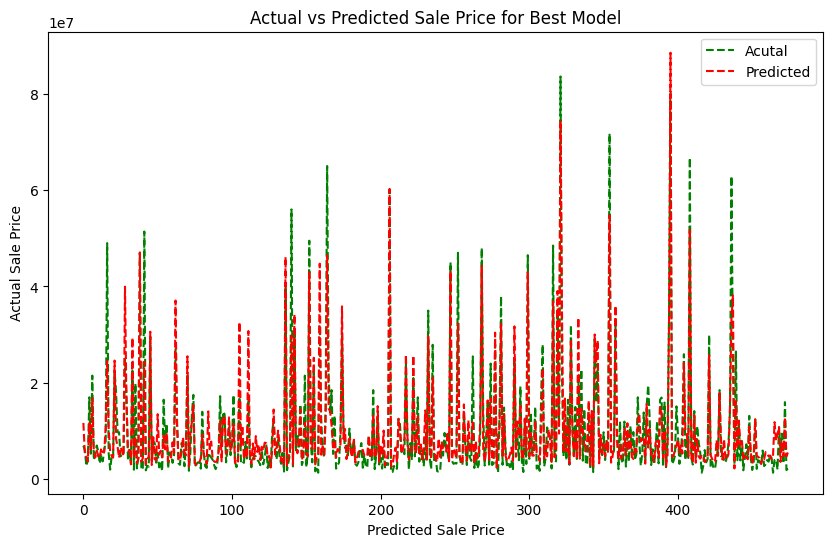

,R_Squared,RMSE,MAE
Gradient Bossting,0.848216,4.613445e+06,2.856061e+06
Lasso,0.831928,4.854683e+06,3.283675e+06
Linear,0.831927,4.854690e+06,3.283684e+06
Ridge,0.830090,4.881151e+06,3.290025e+06
XGBReggressor,0.812019,5.134160e+06,2.690256e+06
DecisionTreeRegressor,0.709215,6.385557e+06,3.166481e+06
Extra Tree,0.677541,6.724351e+06,3.074977e+06
KNeighborRegressor,0.546021,7.978675e+06,4.144365e+06
ElasticNet,0.447074,8.805342e+06,5.177581e+06


In [58]:
algo_test(x,y,plot=True)

## <font color="#2128A6"> Feature Importance

In [60]:
GBR=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

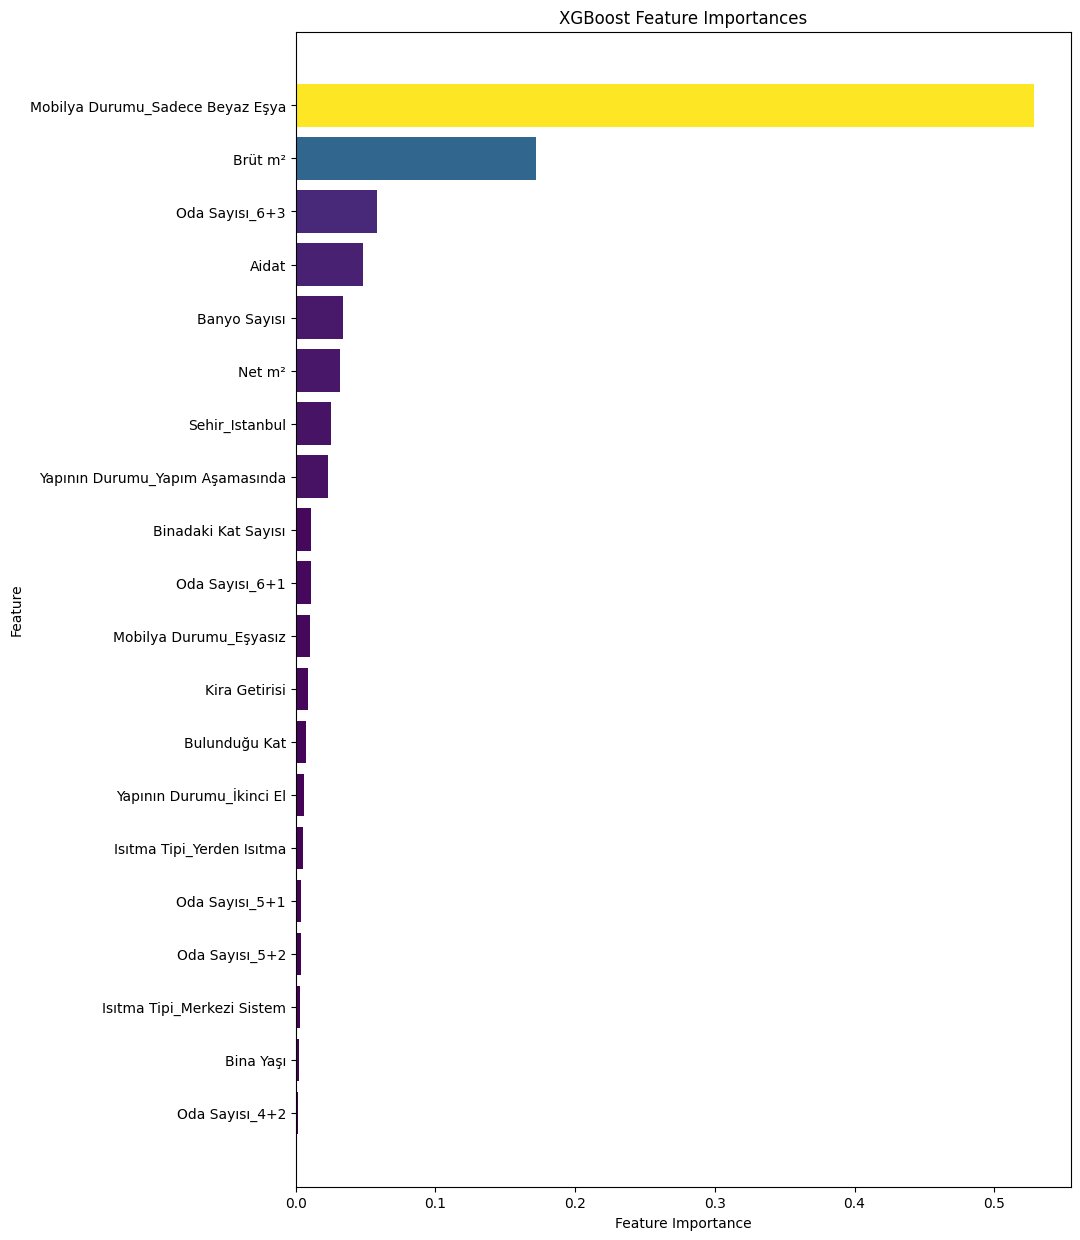

In [61]:
feature_importance = GBR.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': GBR.feature_names_in_,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0.0013]

plt.figure(figsize=(10, 15))
colors = plt.cm.viridis(feature_importance_df['Importance'] / feature_importance_df['Importance'].max())
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],color=colors)
plt.gca().invert_yaxis()  
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()


## <font color="#2128A6"> Interpretation of Results

In predicting house prices, deep learning achieved the **highest performance** with an \( R^2 \) score of **0.855** and a **root mean squared error (RMSE)** of approximately **4.51 million**. Among convolutional methods, Gradient Boosting performed the best with an \( R^2 \) score of 0.848 and an RMSE of 4.61 million, closely matching deep learning in accuracy. Traditional regression methods like Lasso and Ridge also performed well, with \( R^2 \) scores above 0.83 but slightly higher RMSE values. Overall, deep learning demonstrated the strongest predictive capability, while Gradient Boosting emerged as the most competitive alternative among the other approaches.
